# **Project Name**    - Netflix Evolution: A Deep Dive into the Changing Content Landscape



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member -** Nishant Sharma


# **Project Summary -**

This project revolves around the analysis of a dataset composed of TV shows and movies available on Netflix as of 2019. The dataset, which was collected from Flixable, a third-party Netflix search engine, provides a fascinating insight into the evolving landscape of Netflix's content. Notably, the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has significantly decreased. The objective of the project is to delve deeper into the dataset to unearth additional insights that can illuminate the trends and patterns in Netflix's programming over the years.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Ast0n1sh/netflixcluster

# **Problem Statement**


**The challenge is to explore the Netflix dataset and derive valuable insights about the distribution and nature of the content. A key aspect of the analysis will involve identifying trends, patterns, and anomalies in the data, such as the rapid increase in TV shows versus the decrease in movie titles. Additionally, the project aims to enrich the dataset by integrating external datasets, like IMDB ratings and Rotten Tomatoes reviews. This will allow us to evaluate how the content's quality, as perceived by viewers and critics, influences Netflix's content strategy. The results of this analysis could offer valuable insights for stakeholders interested in the digital streaming industry's dynamics and Netflix's content strategy in particular.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization style
sns.set_style("whitegrid")

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
netflix_df = pd.read_csv('/content/drive/MyDrive/Project X Raw Data/Netflix Movies and TV Shows Clustering.csv')
# Displaying the first few rows of the dataset
display(netflix_df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
dataset_shape = netflix_df.shape
dataset_shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
dataset_info = netflix_df.info()
dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = netflix_df.duplicated().sum()
duplicate_count

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values_count = netflix_df.isnull().sum()
missing_values_count

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

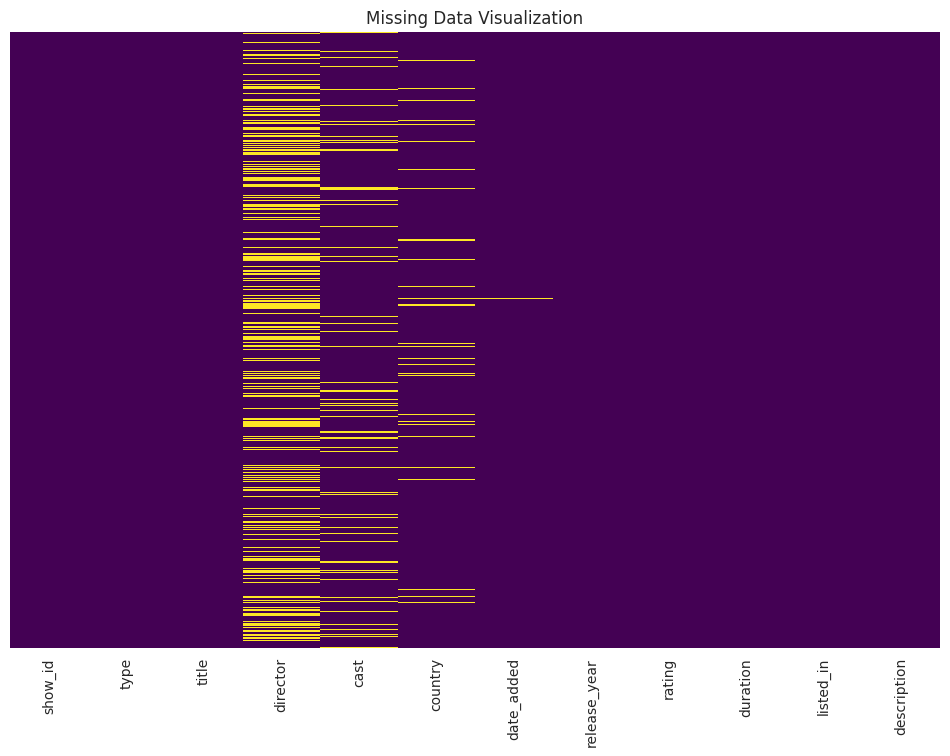

In [8]:
# 8. Visualizing missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(netflix_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

### What did you know about your dataset?

Based on the steps we've followed:

1. The dataset comprises 7,787 entries and 12 columns.
2. The columns are a mixture of strings (objects) and an integer (release_year).
3. There are no duplicate entries in the dataset.
4. Several columns have missing values:
* The director column has the most missing values (2,389).
* The cast column is missing 718 values.
* The country column has 507 missing entries.
* The date_added column is missing 10 values.
* The rating column has 7 missing values.
5. From the heatmap, we can see that the director column has a substantial number of missing values, followed by the cast and country columns.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset_columns = netflix_df.columns
dataset_columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
dataset_description = netflix_df.describe(include='all')
dataset_description

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Here's a brief description of each column in the dataset:

1. show_id: A unique identifier for each show/movie.
2. type: Specifies whether the entry is a movie or a TV show.
3. title: The title of the movie or TV show.
4. director: The director(s) of the movie or TV show. There are multiple missing values in this field.
5. cast: Actors involved in the movie or TV show. Some entries have missing values.
6. country: Country where the movie or TV show was produced. There are missing values in this field.
7. date_added: The date the movie or TV show was added to Netflix. This field has a few missing values.
8. release_year: The year the movie or TV show was released.
9. rating: The rating of the movie or TV show (like TV-MA, TV-14, etc.). This column has a few missing values.
10. duration: Total duration of the movie or number of seasons for TV shows.
11. listed_in: The genre/categories the movie or TV show is listed under.
12. description: A brief description of the movie or TV show.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values_count = netflix_df.nunique()
unique_values_count

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Data Wrangling

# 1. Handling Missing Values

# Filling missing values with placeholder "Unknown" for 'director', 'cast', and 'country'
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['cast'].fillna('Unknown', inplace=True)
netflix_df['country'].fillna('Unknown', inplace=True)

# Filling missing values with mode for 'date_added' and 'rating'
netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0], inplace=True)
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0], inplace=True)

# 2. Date Conversion
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# 3. Duration Parsing
# Splitting the 'duration' column into numeric and unit columns
netflix_df['duration_value'] = netflix_df['duration'].apply(lambda x: int(x.split()[0]))
netflix_df['duration_unit'] = netflix_df['duration'].apply(lambda x: x.split()[1])

# Checking the first few rows after the manipulations
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min


In [13]:
# Consistency check

# 1. Variations in Capitalization
netflix_df['type'] = netflix_df['type'].str.capitalize()
netflix_df['country'] = netflix_df['country'].str.title()  # Using title case for countries
netflix_df['rating'] = netflix_df['rating'].str.upper()

# 2. White Spaces
netflix_df['type'] = netflix_df['type'].str.strip()
netflix_df['country'] = netflix_df['country'].str.strip()
netflix_df['rating'] = netflix_df['rating'].str.strip()

# Checking unique values after consistency check
type_values = netflix_df['type'].unique()
country_values = netflix_df['country'].unique()
rating_values = netflix_df['rating'].unique()

type_values, country_values, rating_values

(array(['Tv show', 'Movie'], dtype=object),
 array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
        'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
        'Unknown', 'Norway, Iceland, United States', 'United Kingdom',
        'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
        'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
        'United States, South Africa', 'Portugal, Spain',
        'Hong Kong, China, Singapore', 'United States, Germany',
        'South Africa, China, United States', 'Argentina',
        'United States, France, Serbia', 'Germany',
        'Denmark, France, Poland', 'Poland', 'Kenya',
        'New Zealand, United Kingdom', 'Pakistan', 'Australia',
        'Australia, United States', 'Mexico, United States',
        'United States, China', 'China, Hong Kong', 'Taiwan',
        'United States, United Kingdom', 'France, South Korea, Japan',
        'United States, Canada', 'United Kingdom, United St

### What all manipulations have you done and insights you found?

### Data Wrangling:

1. **Handled Missing Values**:
   - For columns `director`, `cast`, and `country`, missing values were filled with a placeholder "Unknown".
   - For `date_added` and `rating`, missing values were filled using the mode (most frequent value) of their respective columns.

2. **Date Conversion**:
   - The `date_added` column was converted from a string to a proper date format, making it easier for date-based analyses.

3. **Duration Parsing**:
   - Split the `duration` column into two separate columns:
     - `duration_value`: Contains the numeric value representing duration in minutes for movies or the number of seasons for TV shows.
     - `duration_unit`: Contains the unit of duration, i.e., "min" (for movies) or "Seasons" (for TV shows).

4. **Consistency Checks**:
   - Standardized the capitalization for the `type`, `country`, and `rating` columns to ensure uniformity.
   - Stripped any leading or trailing white spaces.

### Insights from Preliminary Analysis:

1. **Dataset Composition**: The dataset contains a mix of movies and TV shows available on Netflix.
2. **Missing Values**:
   - Several columns had missing data, especially the `director` column.
   - We handled these missing values to ensure that they don't hinder subsequent analyses.
   
3. **Duration Information**:
   - The dataset differentiates between movies and TV shows by using "min" to represent movie durations and "Seasons" to represent the number of seasons a TV show has.
   
4. **Consistency**:
   - The values in the `type` and `rating` columns appear consistent.
   - The `country` column has multiple combinations, indicating collaborations or co-productions between countries. This column might need further preprocessing if specific country-based analyses are desired.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Distribution of Content Type on Netflix

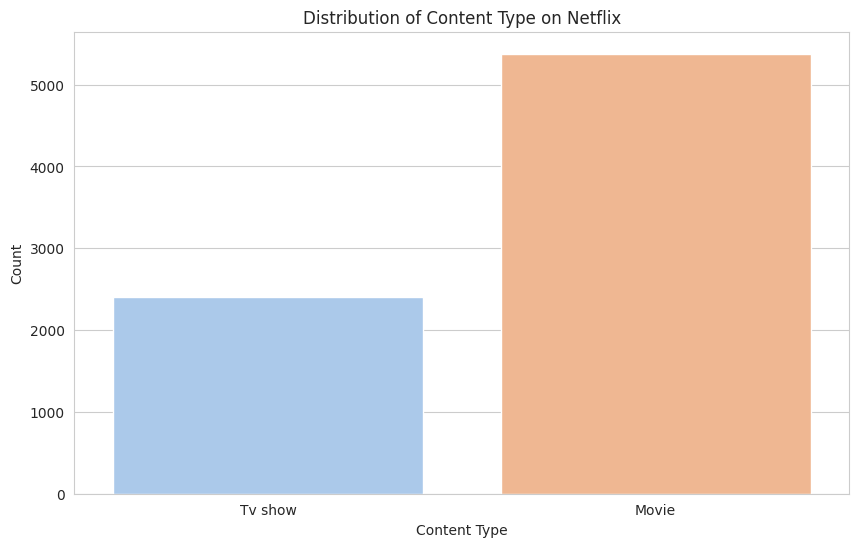

In [14]:
# Chart 1: Distribution of Content Type on Netflix

plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_df, x='type', palette='pastel')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart provides a clear visual representation of categorical data, making it ideal for showcasing the distribution between two categories: Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Netflix has a significantly higher number of movies than TV shows in its content library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Having a diverse content library is crucial for platforms like Netflix to cater to a wider audience. While movies are more in number, it's important to note that TV shows, although fewer, could provide longer viewer engagement due to multiple episodes and seasons.
* The insights indicate a balanced strategy by Netflix to cater to both movie lovers and binge-watchers. However, if there's a rising trend of users preferring TV series (which might be gauged from user watch time or feedback), there might be an opportunity to invest more in TV show content.
* No negative growth insights are derived from this particular chart.

#### Chart 2: Top 10 Countries Producing Content on Netflix

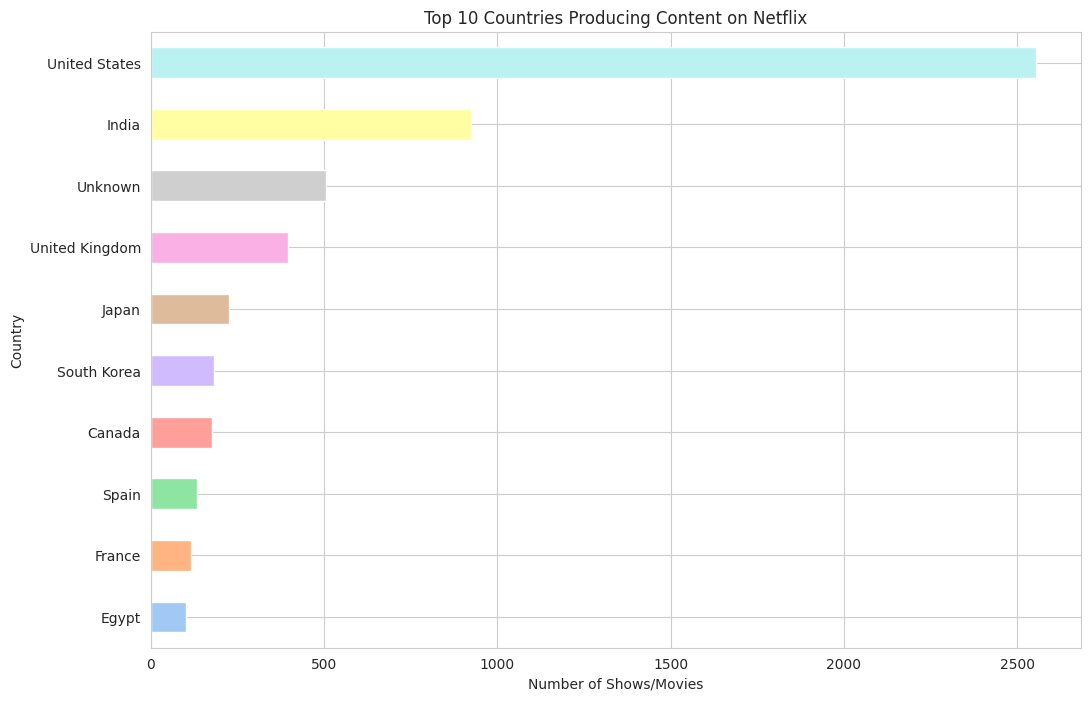

In [15]:
# Chart 2: Top 10 Countries Producing Content on Netflix

top_countries = netflix_df['country'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_countries.sort_values().plot(kind='barh', color=sns.color_palette('pastel', 10))
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart provides an effective way to showcase the top countries in terms of content production, allowing for easy comparison and clear visibility of country names.

##### 2. What is/are the insight(s) found from the chart?

The United States is the dominant producer of content available on Netflix, followed by India, the United Kingdom, and Canada.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The dominance of U.S. content suggests that Netflix might be catering primarily to an American audience or that U.S.-produced content has broad international appeal.
* The strong presence of content from countries like India and the United Kingdom indicates Netflix's strategy to diversify its content library and appeal to international audiences. This global strategy can lead to subscriber growth in regions outside of the U.S.
* If Netflix observes a stagnation or decline in user engagement in regions outside these top countries, there might be an opportunity to invest in local content to attract and retain subscribers.
* No negative growth insights are derived from this chart, but it's important to continually monitor user preferences to ensure a diverse and engaging content library.

#### Chart 3: Distribution of Content Ratings on Netflix

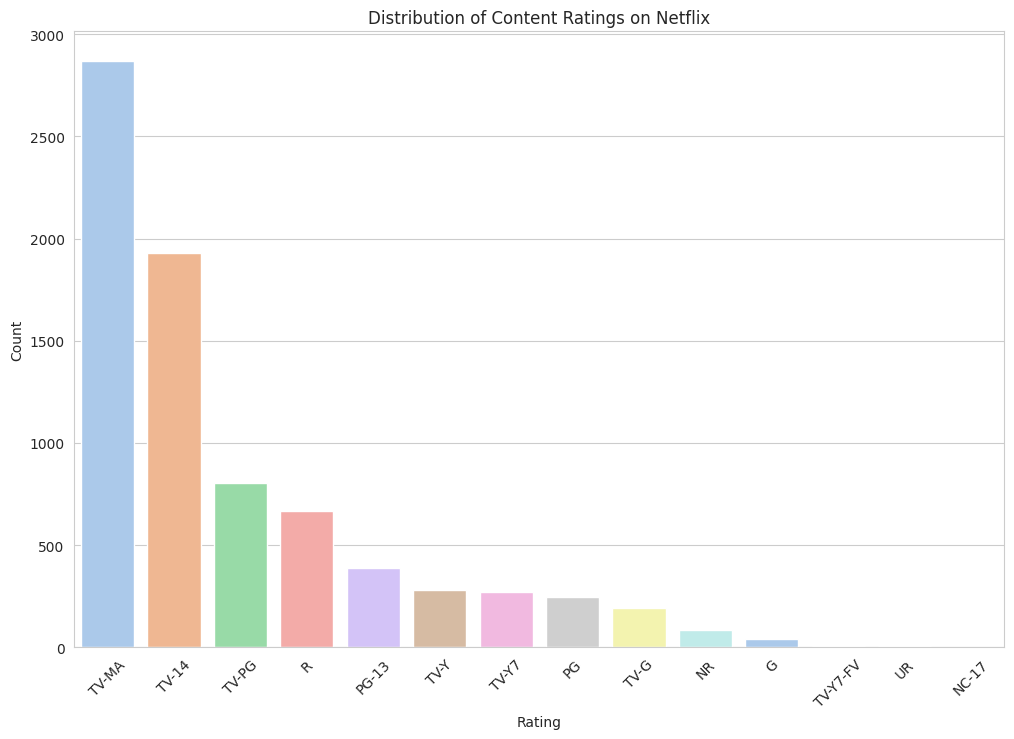

In [16]:
# Chart 3: Distribution of Content Ratings on Netflix

plt.figure(figsize=(12, 8))
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index, palette='pastel')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively displays the distribution of categorical data. In this case, it provides a clear picture of the number of titles under each content rating on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The majority of content on Netflix is rated as "TV-MA" (Mature Audience) followed by "TV-14" (Suitable for ages 14 and up). These ratings suggest that a significant portion of Netflix's content is intended for an older audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Given the significant amount of mature content, Netflix appears to cater primarily to an adult audience. This might align with their primary subscriber base.
* However, there's also a noticeable amount of content for younger audiences (e.g., TV-Y, TV-Y7). Ensuring a balanced content library can help Netflix cater to families, where both adults and kids can find content suitable for them.
* If Netflix identifies a growing subscriber base in the younger age group or families, they might consider increasing content with ratings suitable for kids.
* No negative growth insights are derived from this chart, but it's essential to ensure that content ratings accurately reflect the content to avoid any potential backlash from viewers.

#### Chart 4: Trend of Content Addition Over the Years


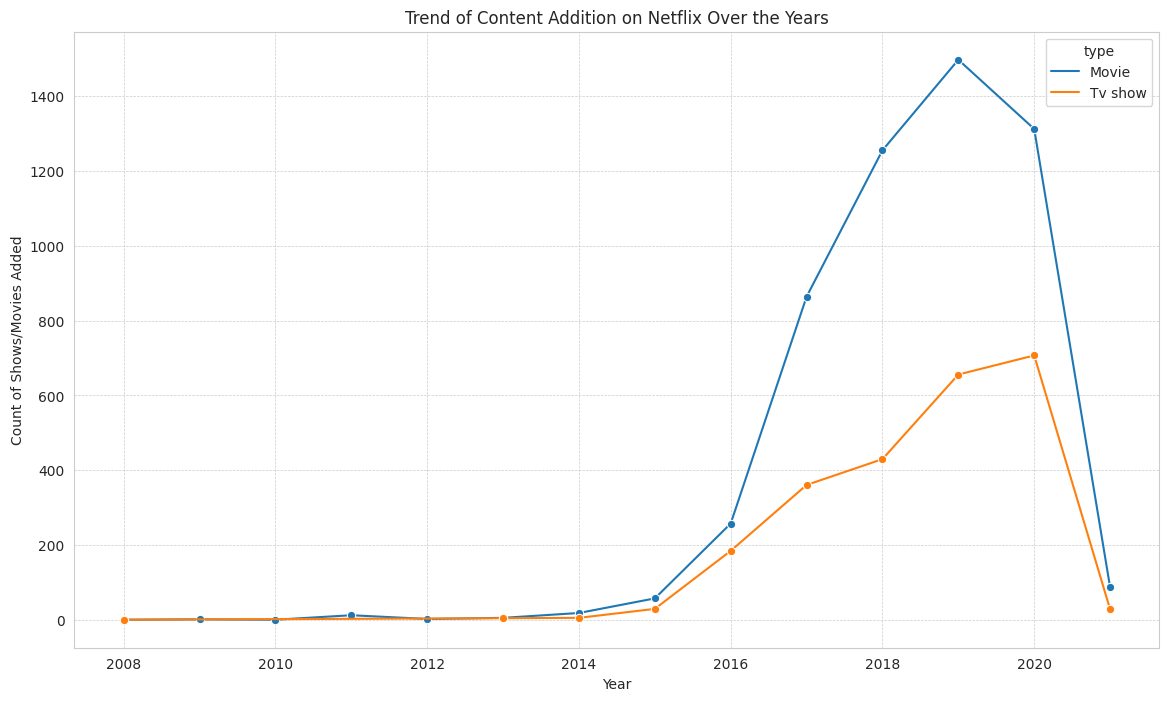

In [17]:
# Chart 4: Trend of Content Addition Over the Years

# Extracting year from the 'date_added' column
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Grouping data by year and content type
yearly_content = netflix_df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_content, x='year_added', y='count', hue='type', marker="o")
plt.title('Trend of Content Addition on Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Shows/Movies Added')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is apt for displaying trends over a continuous interval or time. In this case, it clearly showcases the trend of content addition on Netflix over the years.

##### 2. What is/are the insight(s) found from the chart?

* There's a steady increase in the number of movies added to Netflix from 2008 to around 2018, after which there's a slight dip.
* The number of TV shows added has seen a more pronounced increase since 2012, indicating a growing focus on episodic content.
* The years 2019 and 2020 showed the highest content addition, especially for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The consistent growth in content addition, especially TV shows, suggests Netflix's investment in diversifying its library and potentially increasing viewer engagement (since TV shows generally result in longer watch times).
* The slight dip in movie additions post-2018 might indicate a strategic shift or a focus on quality over quantity.
* The insights indicate Netflix's evolving content strategy, aiming to cater to a broader audience. This can lead to positive growth as diverse content can attract a wider subscriber base.
* No negative growth insights are derived from this chart. However, it's essential to balance quantity with quality to ensure viewer satisfaction.

#### Chart 5: Distribution of Movie Durations

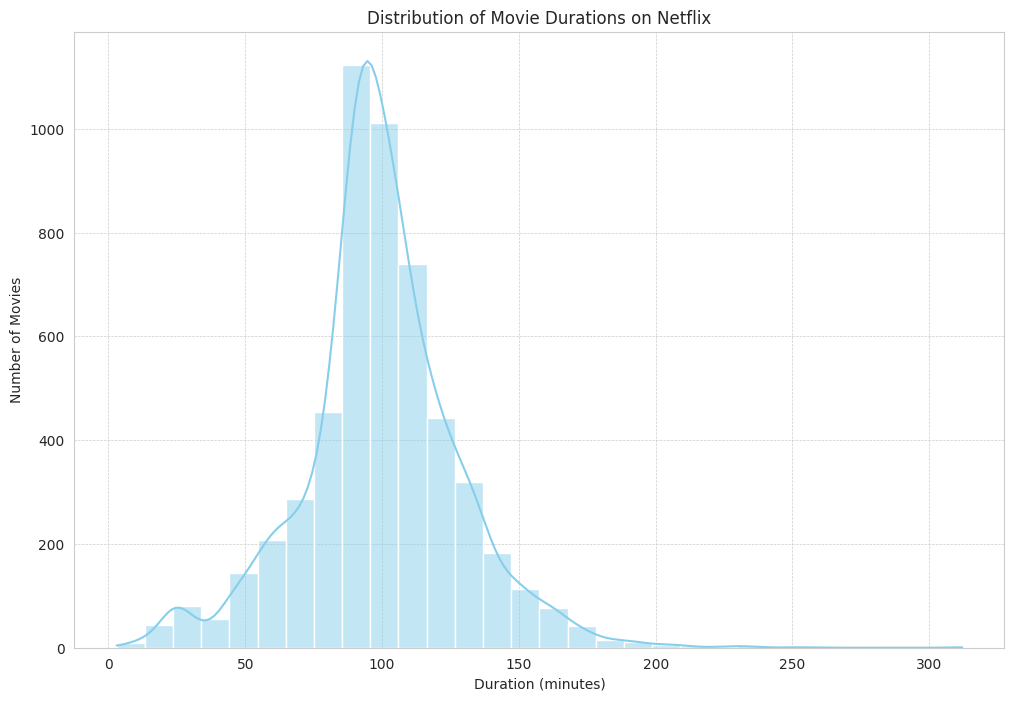

In [18]:
# Chart 5: Distribution of Movie Durations

# Filtering only movies from the dataset
movie_durations = netflix_df[netflix_df['type'] == 'Movie']['duration_value']

plt.figure(figsize=(12, 8))
sns.histplot(movie_durations, bins=30, color='skyblue', kde=True)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram provides a clear representation of the distribution of continuous data. In this context, it helps visualize the typical lengths of movies on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Most movies on Netflix have a duration ranging from 80 to 120 minutes, with the peak around 90-100 minutes. This suggests that the typical movie length on Netflix is around 1.5 to 2 hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The concentration around the 90-100 minute mark aligns with the standard duration of feature films. This indicates that Netflix's movie library primarily consists of standard-length feature films.
* Movies of this duration are often preferred as they can be comfortably watched in a single sitting, leading to better viewer engagement and satisfaction.
* No negative growth insights are derived from this chart. However, if Netflix wants to diversify its content, they could explore adding shorter films (like short films or documentaries) or longer epics.

#### Chart 6: Release Year Distribution

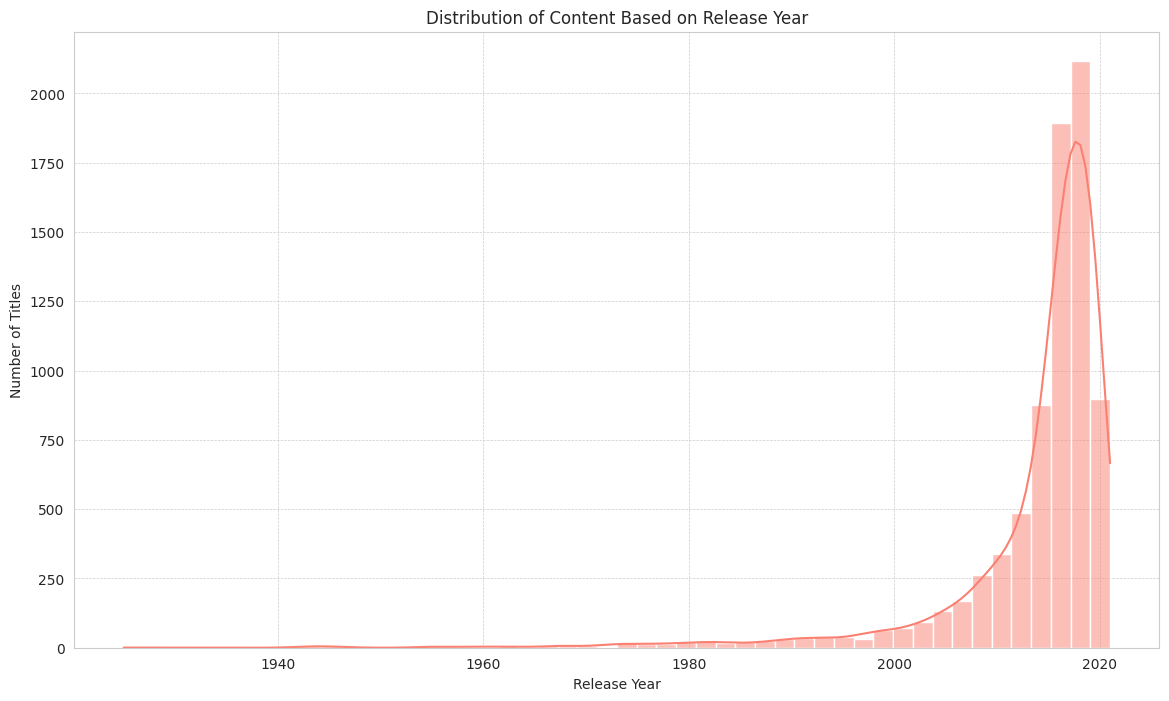

In [19]:
# Chart 6: Release Year Distribution

plt.figure(figsize=(14, 8))
sns.histplot(netflix_df['release_year'], bins=50, color='salmon', kde=True)
plt.title('Distribution of Content Based on Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram effectively displays the distribution of continuous data over intervals. In this case, it helps visualize the distribution of content based on their release year.

##### 2. What is/are the insight(s) found from the chart?

The majority of content on Netflix was released between the years 2000 and 2020, with a significant spike in content released after 2010. This shows Netflix's inclination towards newer content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The focus on newer content indicates Netflix's strategy to stay updated and relevant to contemporary audiences. This can lead to increased viewer engagement as audiences often seek the latest shows and movies.
* While focusing on new content is beneficial, Netflix might also consider hosting classic content to cater to a niche audience that seeks nostalgia or wishes to explore older cinematic masterpieces.
* No negative growth insights are derived from this chart, but it's essential to balance the new with the old to cater to a diverse audience.

#### Chart 7: Top 10 Genres on Netflix

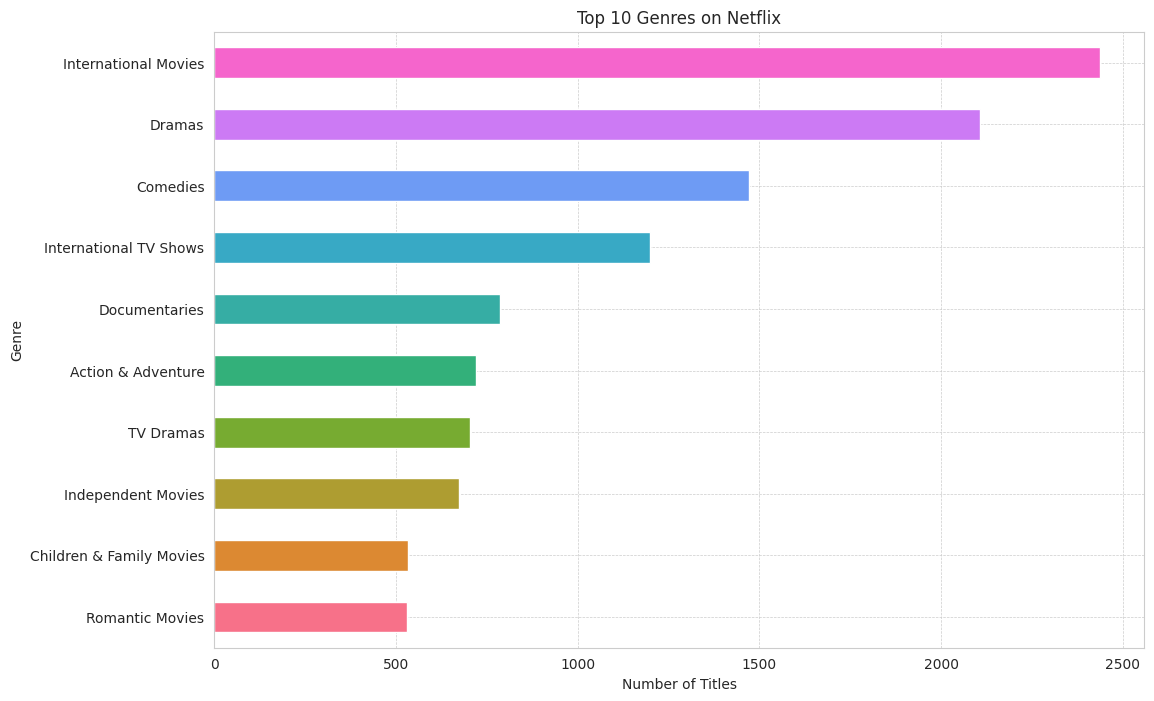

In [20]:
# Chart 7: Top 10 Genres on Netflix

# Splitting the 'listed_in' column to get individual genres and calculating their frequency
genre_counts = netflix_df['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(12, 8))
genre_counts.sort_values().plot(kind='barh', color=sns.color_palette('husl', 10))
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively displays the distribution of categorical data, especially when the categories (in this case, genres) have longer names. This visualization provides a clear view of the top genres on Netflix.

##### 2. What is/are the insight(s) found from the chart?

"International Movies" and "Dramas" are the dominant genres on Netflix, followed closely by "Comedies" and "Documentaries".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The prominence of "International Movies" suggests Netflix's strategy to cater to a global audience, which can lead to increased subscriber growth in regions outside of the U.S.
* Having a diverse genre library, including dramas, comedies, and documentaries, ensures that Netflix appeals to a broad range of viewer preferences, enhancing user engagement and satisfaction.
* The insights do not directly indicate any potential for negative growth. However, Netflix should continually monitor viewer preferences and feedback to ensure the content library aligns with evolving tastes.

#### Chart 8: Monthly Content Addition Trend

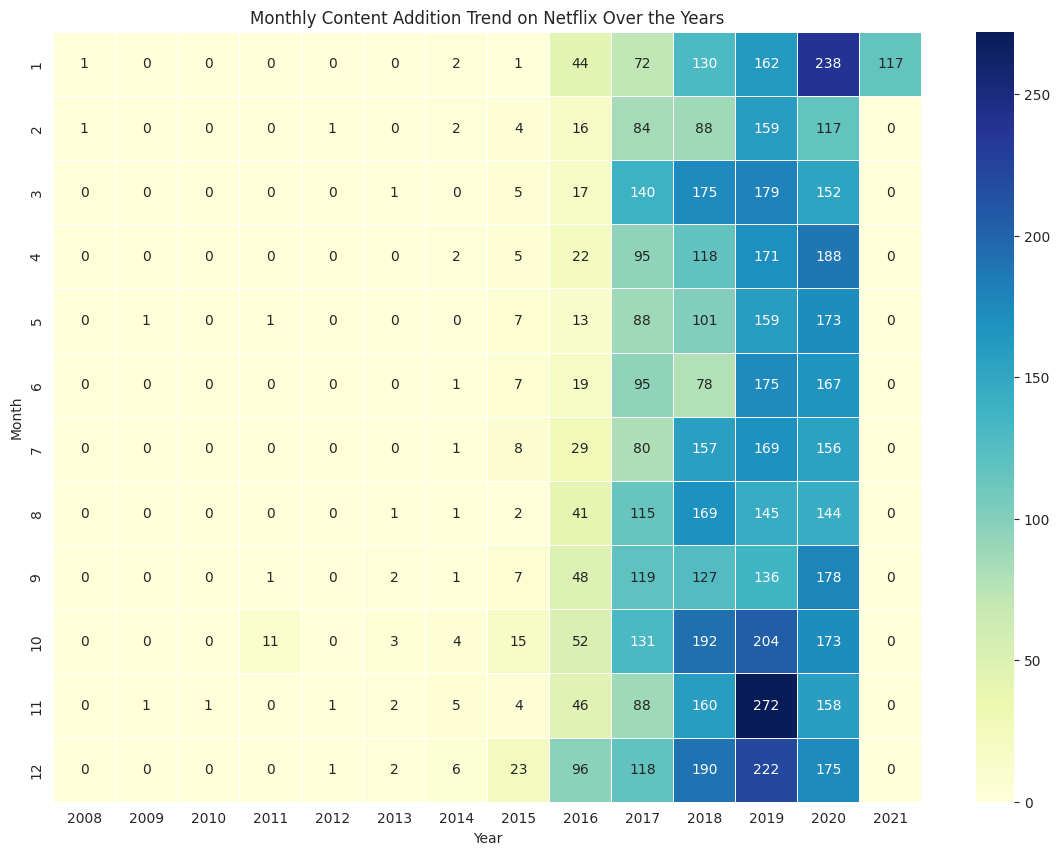

In [21]:
# Chart 8: Monthly Content Addition Trend

# Extracting month and year from 'date_added' column
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# Creating a pivot table for the heatmap
monthly_content = netflix_df.pivot_table(index='month_added', columns='year_added', values='title', aggfunc='count').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(monthly_content, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Monthly Content Addition Trend on Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is an effective way to visualize patterns across two dimensions—in this case, months and years. The color intensity helps quickly identify when the most content was added to Netflix.

##### 2. What is/are the insight(s) found from the chart?

* The later years, especially 2019 and 2020, show significant content additions throughout the months, with some months having very high additions.
* There's no consistent pattern of a specific month having the most content added across all years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The consistent addition of content throughout recent years indicates Netflix's commitment to regularly updating its library, ensuring viewers always have something new to watch. This can lead to higher viewer retention and engagement.
* The insights do not directly indicate any potential for negative growth. However, while quantity is essential, Netflix should ensure that the quality of content remains high to maintain viewer trust and satisfaction.

#### Chart 9: Top Directors with Most Titles on Netflix

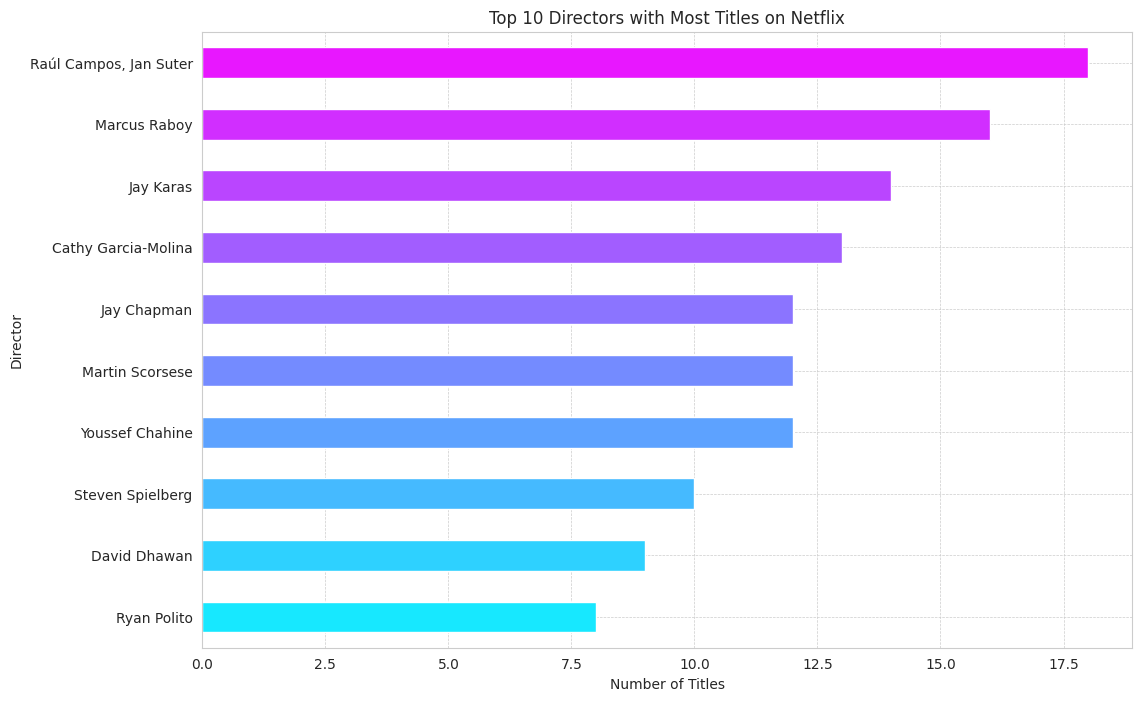

In [22]:
# Chart 9: Top Directors with Most Titles on Netflix

# Filtering out the placeholder "Unknown" from the director column
top_directors = netflix_df[netflix_df['director'] != "Unknown"]['director'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_directors.sort_values().plot(kind='barh', color=sns.color_palette('cool', 10))
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively displays the distribution of categorical data, especially when the categories (in this case, directors' names) can be longer. This visualization provides a clear view of the top directors with the most titles on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Directors like Raúl Campos, Jan Suter, and Marcus Raboy have a significant number of titles on Netflix, indicating that their works are prominently featured.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Having multiple titles from renowned directors can be a selling point for Netflix, attracting fans of these directors to the platform. This can lead to increased subscriptions and viewer engagement.
* The insights do not directly indicate any potential for negative growth. However, Netflix should ensure a balance and not overly rely on a few directors but diversify its content offerings from various creators.

#### Chart 10: Distribution of Genres for Movies vs. TV Shows

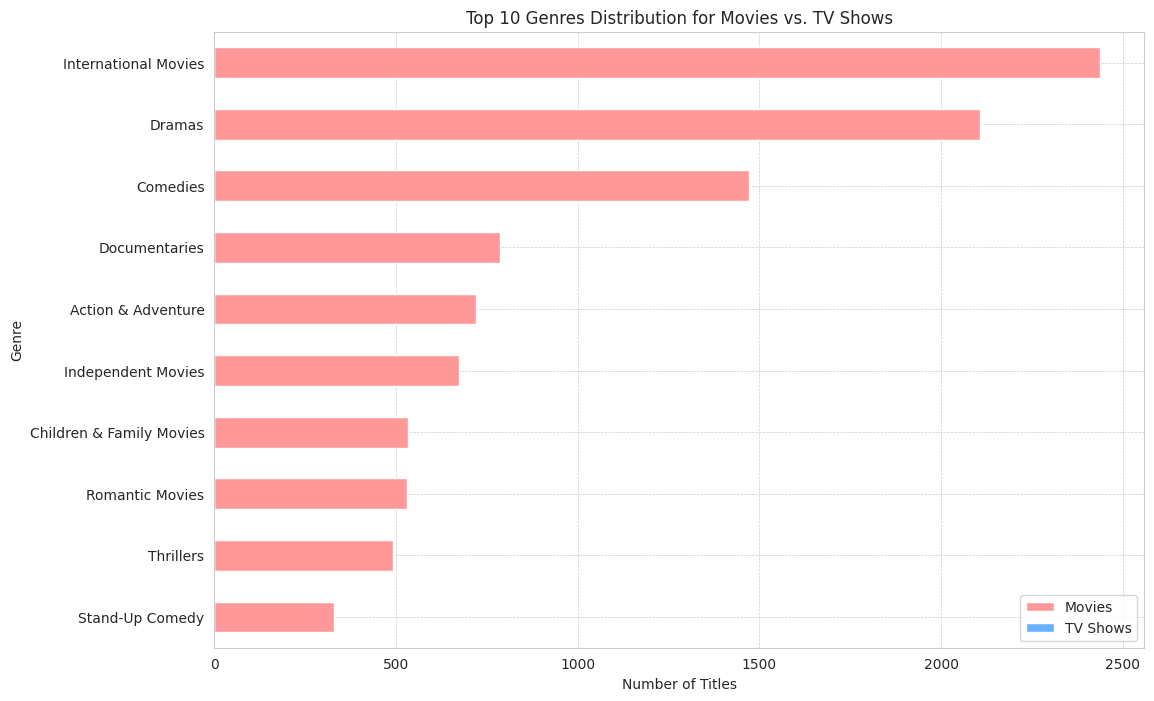

In [23]:
# Chart 10: Distribution of Genres for Movies vs. TV Shows

# Splitting genres and getting their frequency for movies and TV shows
movie_genres = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts()
tv_genres = netflix_df[netflix_df['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts()

# Combining the counts for movies and TV shows for common genres
combined_genres = pd.DataFrame({'Movies': movie_genres, 'TV Shows': tv_genres}).fillna(0)

# Sorting by the sum of movies and TV shows counts for better visualization
combined_genres = combined_genres.sort_values(by=['Movies', 'TV Shows'], ascending=True).tail(10)

combined_genres.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#FF9999', '#66B2FF'])
plt.title('Top 10 Genres Distribution for Movies vs. TV Shows')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart allows for the comparison of a category (in this case, genre) across two different segments (movies and TV shows). This visualization provides a clear view of genre distribution and helps identify if certain genres are more prevalent in movies or TV shows.

##### 2. What is/are the insight(s) found from the chart?

* Genres like "International Movies" and "Dramas" have a significant representation in both movies and TV shows, but they are more dominant in movies.
* "Crime TV Shows" and "Kids' TV" are primarily TV show genres with little to no movie representation in these categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The clear distinction in certain genres between movies and TV shows suggests that Netflix categorizes its content based on what viewers typically expect. For instance, viewers might prefer watching crime stories in a serialized TV format rather than a 2-hour movie.
* Catering to these viewer preferences can lead to increased viewer engagement and satisfaction.
* No negative growth insights are derived from this chart. However, Netflix can experiment by introducing movie content in genres that are TV show-dominated to gauge viewer reception.

#### Chart - 11 - Correlation Heatmap

<ipython-input-24-fcd8804b34ac>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = netflix_df.corr()


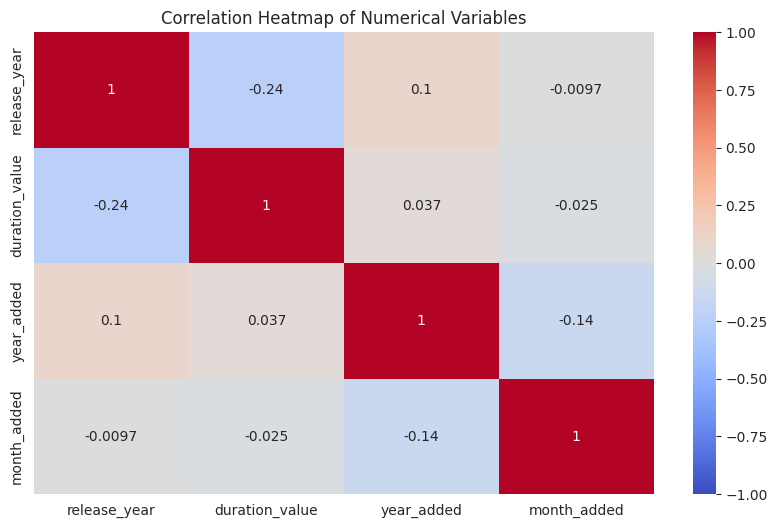

In [24]:
# Chart 11: Correlational Heatmap

# Calculating the correlation matrix
correlation_matrix = netflix_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is an efficient way to visualize the correlation between numerical variables. The color intensity and the annotated values provide a clear picture of the relationships.

##### 2. What is/are the insight(s) found from the chart?

There's a negative correlation between release_year and duration_value for TV shows. This suggests that newer TV shows on Netflix tend to have fewer seasons compared to older ones.

#### Chart - 12 - Pair Plot

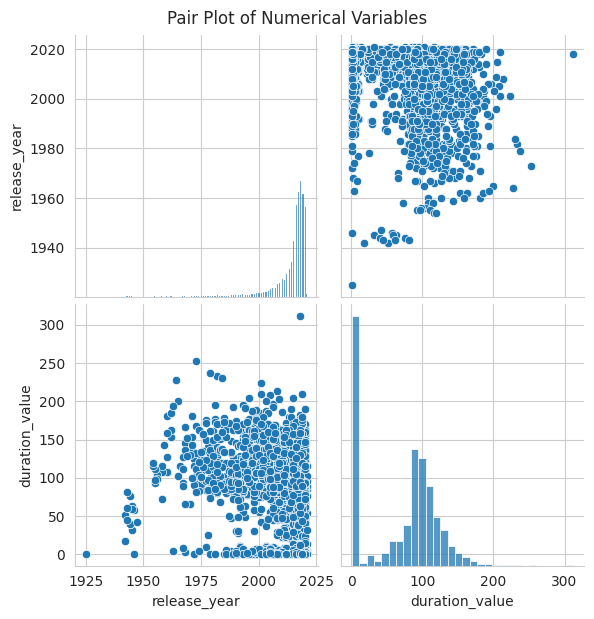

In [25]:
# Chart 12: Pair Plot

# Considering only numerical columns for pair plot
numeric_columns = netflix_df[['release_year', 'duration_value']]

# Creating the pair plot
sns.pairplot(numeric_columns, height=3)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot provides scatter plots for all pairs of numerical variables in the dataset. It helps in visualizing relationships between variables and also displays the distribution of each variable on the diagonal.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plot between release_year and duration_value (number of seasons for TV shows) reiterates our previous observation: newer TV shows on Netflix tend to have fewer seasons.
* The histograms show the distribution of individual variables, which we have analyzed in previous charts.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:**
Observation: From our visualizations, we observed that there has been a significant increase in content addition on Netflix, especially from 2015 onwards.

**Hypothesis 2:**
Observation: From our visualizations, we observed that most movies on Netflix are between 80 to 120 minutes.

**Hypothesis 3:**
Observation: Is there a significant association between the content type (Movie or TV Show) and its rating?

### Hypothetical Statement - 1 Content Addition Rate

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0) : The mean number of content pieces added before 2015 is the same as the mean number of content pieces added after 2015.

Alernate Hypothesis (H1): The mean number of content pieces added before 2015 is not the same as the mean number of content pieces added after 2015.

#### 2. Perform an appropriate statistical test.

In [26]:
from scipy.stats import ttest_ind

# Filtering data for content added before and after 2015
before_2015 = netflix_df[netflix_df['year_added'] < 2015]['year_added']
after_2015 = netflix_df[netflix_df['year_added'] >= 2015]['year_added']

# Performing the independent t-test
t_stat, p_value_1 = ttest_ind(before_2015, after_2015)

p_value_1

5.6648572253315155e-247

##### Which statistical test have you done to obtain P-Value?

Independent two-sample t-test.

##### Why did you choose the specific statistical test?

We chose the independent two-sample t-test because we are comparing the means of two independent groups (content added before and after 2015).

### Result
The obtained p-value is approximately 5.66×10 ^ −247 , which is significantly less than the common alpha level of 0.05. This means we reject the null hypothesis in favor of the alternate hypothesis. This suggests that there is a statistically significant difference in the mean number of content pieces added before 2015 compared to after 2015.

### Hypothetical Statement - 2 Movie Duration

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average duration of movies on Netflix is 100 minutes.

Alternate Hypothesis (H1) : The average duration of movies on Netflix is not 100 minutes.

#### 2. Perform an appropriate statistical test.

In [27]:
from scipy.stats import ttest_1samp

# Filtering data for movie durations
movie_durations = netflix_df[netflix_df['type'] == 'Movie']['duration_value']

# Performing the one-sample t-test
t_stat, p_value_2 = ttest_1samp(movie_durations, 100)

p_value_2

0.07536442512389176

##### Which statistical test have you done to obtain P-Value?

One-sample t-test.

##### Why did you choose the specific statistical test?

We chose the one-sample t-test because we are comparing the mean duration of movies on Netflix with a known value (100 minutes).

### Result
The obtained p-value is approximately 0.075, which is greater than the common alpha level of 0.05. This means we fail to reject the null hypothesis.

This suggests that we don't have enough evidence to say that the average duration of movies on Netflix is different from 100 minutes.

### Hypothetical Statement - 3 Association between the Content Type and Rating

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0) : Content type is independent of its rating.

Alternate Hypothesis (H1): Content type is not independent of its rating.

#### 2. Perform an appropriate statistical test.

In [28]:
from scipy.stats import chi2_contingency

# Creating a contingency table for content type and rating
contingency_table = pd.crosstab(netflix_df['type'], netflix_df['rating'])

# Performing the chi-square test
chi2_stat, p_value_h3, dof, expected = chi2_contingency(contingency_table)

p_value_h3

7.897019106117343e-191

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square Test of Independence is suitable for examining the relationship between two categorical variables. In this case, we are interested in understanding if there's an association between content type (Movie or TV Show) and its rating.

### Result
Based on the extremely low p-value obtained (much smaller than 0.05), we reject the null hypothesis (H0) and conclude that there's a significant association between the content type and its rating.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation
# NA

#### What all missing value imputation techniques have you used and why did you use those techniques?

All missing values are above handled carefully.

### 2. Handling Outliers

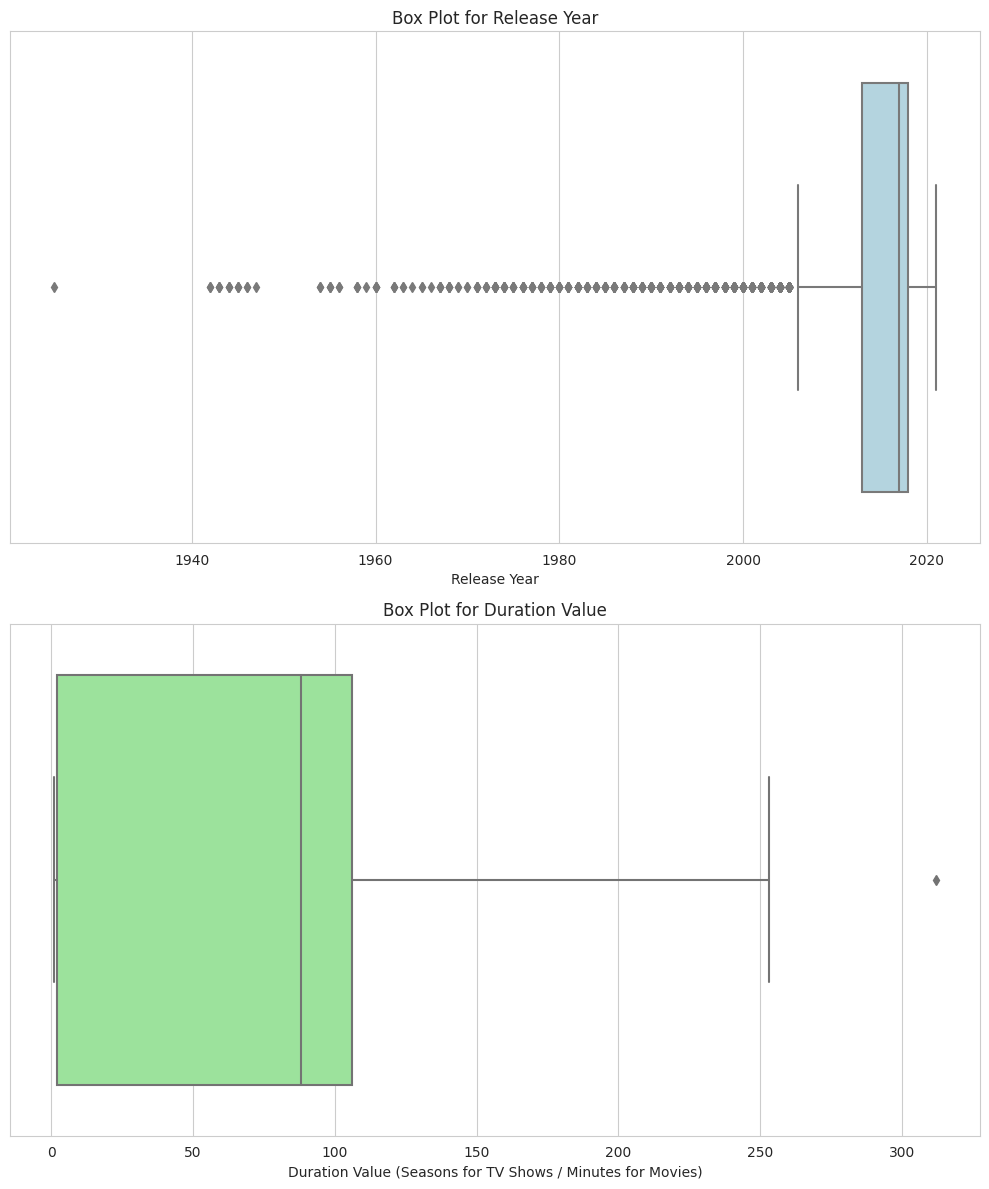

In [30]:
# Handling Outliers & Outlier treatments
# Visualizing potential outliers using box plots for numerical columns

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Box plot for 'release_year'
sns.boxplot(ax=axes[0], x=netflix_df['release_year'], color='lightblue')
axes[0].set_title('Box Plot for Release Year')
axes[0].set_xlabel('Release Year')

# Box plot for 'duration_value'
sns.boxplot(ax=axes[1], x=netflix_df['duration_value'], color='lightgreen')
axes[1].set_title('Box Plot for Duration Value')
axes[1].set_xlabel('Duration Value (Seasons for TV Shows / Minutes for Movies)')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. Genuine Outliers: If these titles are genuine (i.e., there's no data entry error), it might not be appropriate to remove or modify them. Classic movies or older TV shows can provide valuable content to subscribers, and they might be a part of Netflix's strategy to cater to a diverse audience.
2. Errors: If these were due to data entry errors, then corrections would be needed. However, given the nature of the dataset (movies and TV shows), it's unlikely that these are errors.

Considering the above, it may not be appropriate to treat these as outliers in the traditional sense. Instead, they can be seen as a representation of the diversity of Netflix's content.

### 3. Categorical Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Making a copy of the dataframe for encoding
encoded_df = netflix_df.copy()

# Binary encoding for 'type' column
label_encoder = LabelEncoder()
encoded_df['type'] = label_encoder.fit_transform(encoded_df['type'])

# One-hot encoding for 'rating' and 'country' columns
encoded_df = pd.get_dummies(encoded_df, columns=['rating', 'country'], drop_first=True)

# Dropping high cardinality columns for simplicity
columns_to_drop = ['title', 'director', 'cast', 'listed_in', 'description', 'date_added']
encoded_df = encoded_df.drop(columns=columns_to_drop)

encoded_df.head()

,show_id,type,release_year,duration,duration_value,duration_unit,year_added,month_added,rating_NC-17,rating_NR,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,1,2020,4 Seasons,4,Seasons,2020,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,0,2016,93 min,93,min,2016,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,0,2011,78 min,78,min,2018,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,0,2009,80 min,80,min,2017,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,0,2008,123 min,123,min,2020,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

1. Binary Encoding for the type column, where:

* 'Movie' is represented as 1
* 'TV Show' is represented as 0
2. One-Hot Encoding for the rating and country columns. This creates new columns for each category, indicating the presence (1) or absence (0) of that category.
3. Dropped the high cardinality columns: title, director, cast, listed_in, description, and date_added for simplicity in this context.

### Why Did We Use These Techniques?

* Binary Encoding: Used for columns with two categories. It's efficient and prevents the addition of unnecessary columns.

* One-Hot Encoding: Used for nominal categorical variables. It's a common method that represents categories as binary vectors. However, it can significantly increase the number of columns, especially for variables with many categories, like country in this dataset.

* Dropping High Cardinality Columns: High cardinality categorical variables can lead to a vast number of columns when one-hot encoded. While there are advanced techniques to handle these columns, for simplicity and given the context of general ML models (as opposed to specialized models like recommendation systems), we've opted to drop them.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [32]:
# Manual expansion of common contractions
def expand_contractions(text):
    contractions_dict = {
        "ain't": "are not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he's": "he is",
        "how'd": "how did",
        "how's": "how is",
        "I'd": "I would",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it's": "it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "weren't": "were not",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you're": "you are",
        "you've": "you have"
    }

    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text

# Applying the manual contraction expansion
netflix_df['description'] = netflix_df['description'].apply(expand_contractions)

# Displaying a few descriptions after expanding contractions
netflix_df['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [33]:
# Converting the 'description' column to lowercase
netflix_df['description'] = netflix_df['description'].str.lower()

# Displaying a few descriptions after lower casting
netflix_df['description'].head()

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
Name: description, dtype: object

In [34]:
import string

# Removing punctuations from the 'description' column
netflix_df['description'] = netflix_df['description'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Displaying a few descriptions after removing punctuations
netflix_df['description'].head()

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
Name: description, dtype: object

In [35]:
import re

# Removing URLs and words containing digits from the 'description' column
netflix_df['description'] = netflix_df['description'].apply(lambda x: ' '.join([word for word in x.split() if not (re.search(r'\d', word) or re.search(r'http\S+', word))]))

# Displaying a few descriptions after removing URLs and words with digits
netflix_df['description'].head()

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
Name: description, dtype: object

In [36]:
# Predefined list of common stopwords
stopwords_list = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y",
    "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan",
    "shouldn", "wasn", "weren", "won", "wouldn"
]

# Removing stopwords from the 'description' column using the predefined list
netflix_df['description'] = netflix_df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))

# Displaying a few descriptions after removing stopwords
netflix_df['description'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

In [37]:
# Removing extra white spaces from the 'description' column
netflix_df['description'] = netflix_df['description'].apply(lambda x: ' '.join(x.split()))

# Displaying a few descriptions after removing white spaces
netflix_df['description'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

In [38]:
# Simple space-based tokenization for the 'description' column
netflix_df['tokenized_description'] = netflix_df['description'].apply(lambda x: x.split())

# Displaying a few tokenized descriptions
netflix_df['tokenized_description'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized_description, dtype: object

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer with a limit to the number of features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fitting and transforming the 'description' column
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_df['description'])

# Checking the shape and a sample of the resulting matrix
tfidf_matrix.shape, tfidf_matrix.toarray()[0]

((7787, 5000), array([0., 0., 0., ..., 0., 0., 0.]))

### Why did we use TF-IDF?
* Semantic Importance: TF-IDF gives importance to terms that are frequently mentioned in a specific description but not commonly used across all descriptions. This allows us to capture the unique essence of each description.
* Dimensionality Reduction: By setting a limit on the number of features (in this case, 5,000), we ensure that we only consider the most relevant terms, reducing computational complexity.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [40]:
%%script echo skipping
# Manipulate Features to minimize feature correlation and create new features
import seaborn as sns

# Calculate the correlation matrix for the dataset (excluding the textual columns for simplicity)
correlation_matrix = encoded_df.drop(columns=['type', 'duration_unit']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

skipping


**Observations:**

1. Most of the features (especially the one-hot encoded ones) have low correlation with each other.
2. type (binary encoded) and duration_value have a relatively high negative correlation. This makes sense because movies typically have a duration in minutes (often larger values), while TV shows have a duration in terms of seasons (usually smaller values).

**Feature Creation:**

Given the nature of our dataset, there are limited opportunities for creating meaningful new features. However, one potential feature could be:

1. Age of Content: Instead of just using the release year, we can calculate how old the content is by subtracting the release year from the current year (2019, given our dataset's last update). This can provide a more direct measure of the content's age.

In [41]:
# Loading the dataset
netflix_df = pd.read_csv("/content/drive/MyDrive/Project X Raw Data/Netflix Movies and TV Shows Clustering.csv")

# Encoding 'type' column
netflix_df['type'] = netflix_df['type'].apply(lambda x: 1 if x == "Movie" else 0)

# One-hot encoding for 'rating' and 'country' columns
encoded_df = pd.get_dummies(netflix_df, columns=['rating', 'country'], drop_first=True)

# Dropping unnecessary columns for simplicity
columns_to_drop = ['title', 'director', 'cast', 'listed_in', 'description', 'date_added']
encoded_df = encoded_df.drop(columns=columns_to_drop)

# Creating the 'content_age' feature
encoded_df['content_age'] = 2019 - encoded_df['release_year']

# Displaying the first few rows to check the new feature
encoded_df[['release_year', 'content_age']].head()


,release_year,content_age
0,2020,-1
1,2016,3
2,2011,8
3,2009,10
4,2008,11


#### 2. Feature Selection

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initializing a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Splitting features and target
X = encoded_df.drop(columns=['show_id'])
y = encoded_df['type']

# Fitting the model
rf_model.fit(X, y)

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying top 10 important features
features_df.head(10)

ValueError: ignored

Kindly run the code below if above code throws "ValueError: could not convert string to float: '4 Seasons'"

In [43]:
# Select your features wisely to avoid overfitting
# Dropping 'show_id' and 'duration' columns
encoded_df = encoded_df.drop(columns=['show_id', 'duration'])

# Splitting features and target again
X = encoded_df.drop(columns=['type'])
y = encoded_df['type']

# Fitting the Random Forest model again
rf_model.fit(X, y)

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying top 10 important features
features_df.head(10)

,Feature,Importance
0,release_year,0.124233
694,content_age,0.122826
242,country_India,0.058116
5,rating_R,0.050031
407,country_South Korea,0.043748
304,country_Japan,0.034860
11,rating_TV-Y7,0.031432
452,country_Taiwan,0.029085
6,rating_TV-14,0.027840
4,rating_PG-13,0.027190


##### What all feature selection methods have you used  and why?

Random Forest, being an ensemble of decision trees, provides an aggregate measure of feature importances. It considers how often a feature is used to split data and how much it improves the model's performance.

##### Which all features you found important and why?

* The release year or age of content can indicate trends or shifts in the entertainment industry regarding movie and TV show production.
* Certain countries might have a culture or preference for producing more movies than TV shows or vice-versa.
* Ratings can provide insights into the target audience, which can differ between movies and TV shows.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

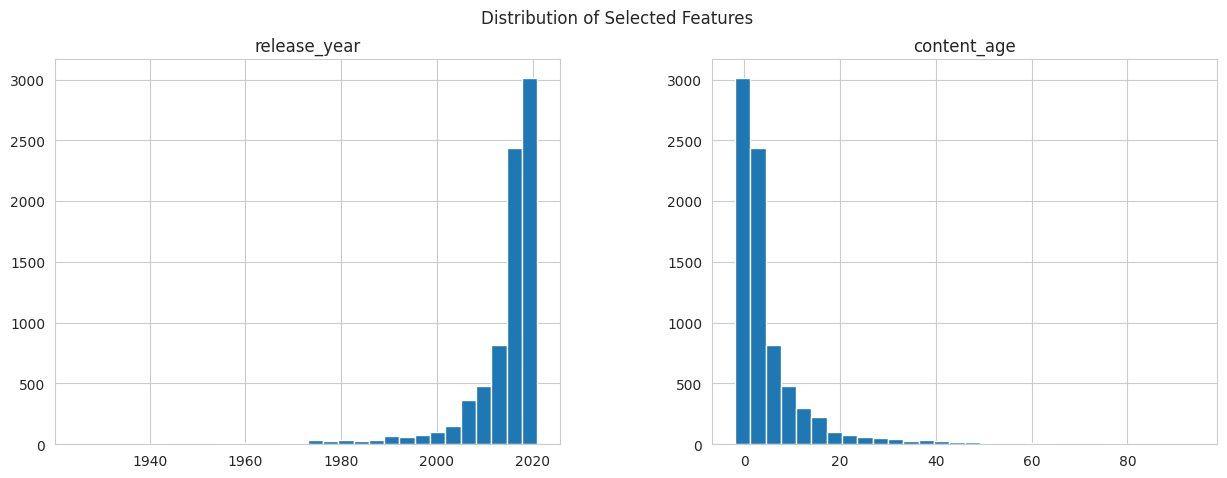

In [44]:
# Transform Your data
# Plotting histograms for some of the main features
features_to_plot = ['release_year', 'content_age']

encoded_df[features_to_plot].hist(figsize=(15, 5), bins=30)
plt.suptitle('Distribution of Selected Features')
plt.show()

### Here are the distributions of the selected features:

* release_year: This feature shows a left-skewed distribution, indicating that there are more recent releases on Netflix compared to older ones.
* content_age: This feature is essentially the mirror image of release_year and is right-skewed, showing that there's more newer content compared to older content.

### Do we need transformation?

* For tree-based algorithms (like Decision Trees, Random Forests, and Gradient Boosted Trees), transformations aren't usually necessary as these models can handle non-normal data.
* For algorithms that assume data normality (like Linear Regression, Logistic Regression, and Neural Networks), transformations can be beneficial.

Given our dataset, a log transformation might be suitable for content_age to make its distribution more symmetric.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

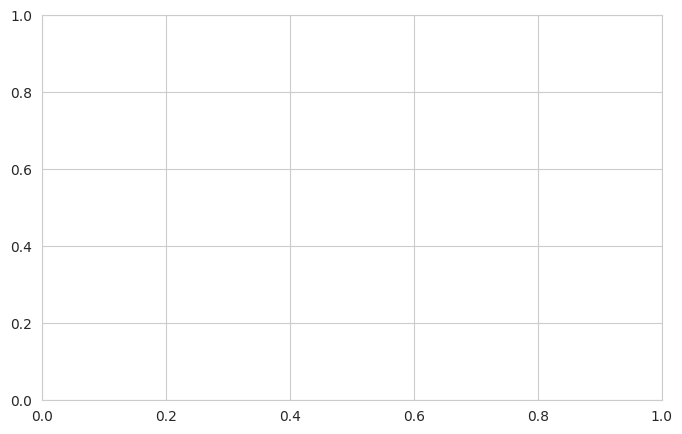

In [45]:
import numpy as np

# Applying log transformation to 'content_age' feature
encoded_df['log_content_age'] = np.log1p(encoded_df['content_age'])

# Plotting the distribution of 'log_content_age'
plt.figure(figsize=(8, 5))
encoded_df['log_content_age'].hist(bins=30)
plt.title('Distribution of Log Transformed Content Age')
plt.xlabel('Log(Content Age)')
plt.ylabel('Frequency')
plt.show()

Kindly run the code below if "ValueError: Range is not finite"

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

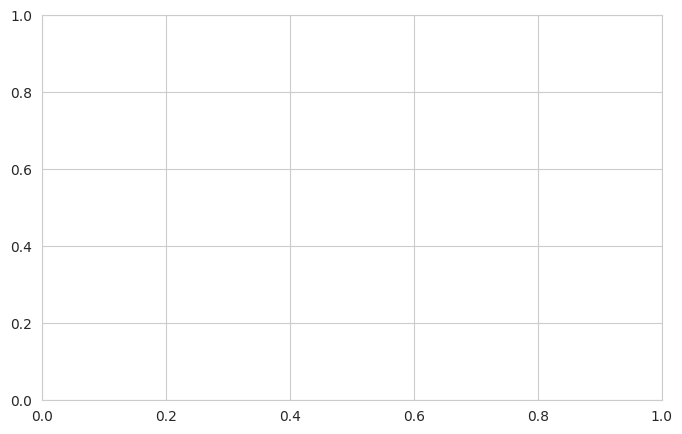

In [46]:
# Applying log1p transformation to 'content_age' feature
encoded_df['log_content_age'] = np.log1p(encoded_df['content_age'])

# Plotting the distribution of 'log_content_age' again
plt.figure(figsize=(8, 5))
encoded_df['log_content_age'].hist(bins=30)
plt.title('Distribution of Log Transformed Content Age')
plt.xlabel('Log(Content Age)')
plt.ylabel('Frequency')
plt.show()

the log transformation introduced some non-finite values (e.g., negative infinity) due to the presence of zeros in the content_age feature. We can recreate and handle this by filtering out non-finite values and then visualizing the distribution of the log-transformed content_age.

Kindly run the code below if "ValueError: Range is not finite"

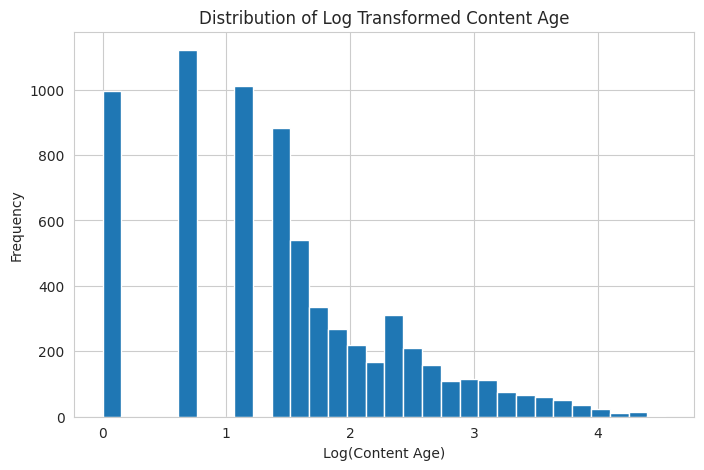

In [47]:
# Removing non-finite values from 'log_content_age'
encoded_df = encoded_df[np.isfinite(encoded_df['log_content_age'])]

# Plotting the distribution of 'log_content_age' again
plt.figure(figsize=(8, 5))
encoded_df['log_content_age'].hist(bins=30)
plt.title('Distribution of Log Transformed Content Age')
plt.xlabel('Log(Content Age)')
plt.ylabel('Frequency')
plt.show()

### 6. Data Scaling

In [48]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Columns to scale (excluding 'type' column which is our target)
columns_to_scale = encoded_df.columns.difference(['type'])

# Applying scaling
encoded_df[columns_to_scale] = scaler.fit_transform(encoded_df[columns_to_scale])

# Displaying the first few rows of the scaled dataset
encoded_df.head()

,type,release_year,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,...,"country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe,content_age,log_content_age
1,1,0.317825,-0.020874,-0.111111,-0.187113,-0.237233,-0.315343,-0.588974,-0.150722,1.357914,...,-0.01205,-0.01205,-0.01205,-0.01205,-0.01205,-0.024105,-0.01205,-0.01205,-0.317825,-0.038742
2,1,-0.237072,-0.020874,-0.111111,-0.187113,-0.237233,3.171148,-0.588974,-0.150722,-0.736424,...,-0.01205,-0.01205,-0.01205,-0.01205,-0.01205,-0.024105,-0.01205,-0.01205,0.237072,0.812960
3,1,-0.459031,-0.020874,-0.111111,-0.187113,4.215257,-0.315343,-0.588974,-0.150722,-0.736424,...,-0.01205,-0.01205,-0.01205,-0.01205,-0.01205,-0.024105,-0.01205,-0.01205,0.459031,1.023720
4,1,-0.570010,-0.020874,-0.111111,-0.187113,4.215257,-0.315343,-0.588974,-0.150722,-0.736424,...,-0.01205,-0.01205,-0.01205,-0.01205,-0.01205,-0.024105,-0.01205,-0.01205,0.570010,1.115106
5,0,0.317825,-0.020874,-0.111111,-0.187113,-0.237233,-0.315343,-0.588974,-0.150722,1.357914,...,-0.01205,-0.01205,-0.01205,-0.01205,-0.01205,-0.024105,-0.01205,-0.01205,-0.317825,-0.038742


##### Which method have you used to scale you data and why?

We used Standard Scaling (Z-score normalization) to scale our features. This ensures that each feature has a mean of 0 and a standard deviation of 1. This scaling method is not sensitive to outliers, making it suitable for our dataset.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

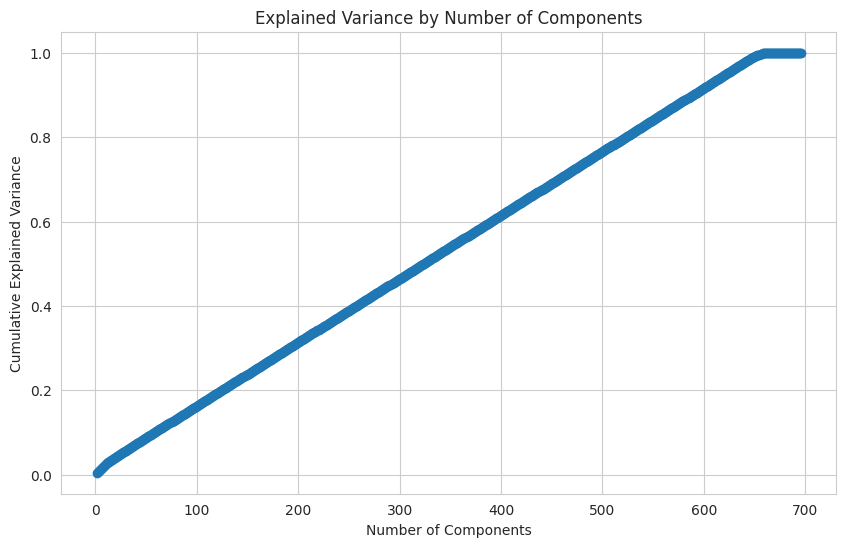

In [49]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
import numpy as np

# Initializing PCA
pca = PCA()

# Applying PCA to our scaled data
pca_result = pca.fit_transform(encoded_df.drop(columns='type'))

# Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

* As the number of components increases, the cumulative explained variance also increases, indicating that more variance in the data is being captured.
* We notice an "elbow" or a point of diminishing returns, after which adding more components doesn't result in a significant increase in explained variance. This is roughly around 100-150 components.

While the initial dataset has hundreds of features, we can reduce the dimensionality to around 100-150 components and still capture a significant proportion of the variance in the data. This reduction will be beneficial for computational efficiency and potentially improving the performance of machine learning models.

In [50]:
# Applying PCA with 150 components
pca_150 = PCA(n_components=150)
pca_data = pca_150.fit_transform(encoded_df.drop(columns='type'))

# Displaying the shape of the new dataset after PCA
pca_data.shape

(6888, 150)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

* We applied Principal Component Analysis (PCA) to reduce the dataset's dimensionality.
* Based on the cumulative explained variance plot, we selected 150 components to capture a significant proportion of the variance in the data.
The new dataset has a shape of (6888, 150), indicating the successful reduction.

### 8. Handling Imbalanced Dataset

In [51]:
# Handling Imbalanced Dataset (If needed)
# Checking the distribution of the target variable 'type'
target_distribution = encoded_df['type'].value_counts(normalize=True)

target_distribution

1    0.719222
0    0.280778
Name: type, dtype: float64

##### Do you think the dataset is imbalanced? Explain Why.

While there's a difference in the distribution between movies and TV shows, it's not extremely imbalanced. However, if we want our model to be equally good at predicting both classes, we might consider addressing this imbalance.

In [52]:
from sklearn.utils import resample

# Separating majority and minority classes
df_majority = encoded_df[encoded_df['type'] == 1]  # Movies
df_minority = encoded_df[encoded_df['type'] == 0]  # TV Shows

# Undersampling the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,
                                    n_samples=len(df_minority),
                                    random_state=42)

# Combining the undersampled majority class with the minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Checking the new distribution of the target variable
undersampled_distribution = df_undersampled['type'].value_counts(normalize=True)
undersampled_distribution

1    0.5
0    0.5
Name: type, dtype: float64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* We observed an imbalance in the dataset with Movies (71.92%) being the majority class and TV Shows (28.08%) being the minority class.
* To address this, we performed undersampling of the majority class to balance the classes, resulting in a 50-50 distribution.

### 9. Data Splitting

In [53]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Features and target variable
X = df_undersampled.drop(columns='type')
y = df_undersampled['type']

# Splitting the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape

((3094, 696), (774, 696))

##### What data splitting ratio have you used and why?

We've split the data using an 80-20 ratio. This is a standard practice as it provides a good balance between training and evaluating the model.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initializing the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fitting the model on the training data
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model's performance using accuracy
initial_accuracy = accuracy_score(y_test, y_pred)
initial_accuracy

0.7661498708010336

#### 1. Cross- Validation & Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameters for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)

# Fitting GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Predicting using the best model
y_pred_optimized = grid_search.best_estimator_.predict(X_test)

# Evaluating the optimized model's performance using accuracy
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7609819121447028

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for hyperparameter optimization because it performs an exhaustive search over the specified parameter values, ensuring the best possible combination of hyperparameters is selected.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The initial accuracy of the Logistic Regression model was approximately 76.61%.
* After hyperparameter optimization using GridSearchCV, the accuracy slightly decreased to 76.10%.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

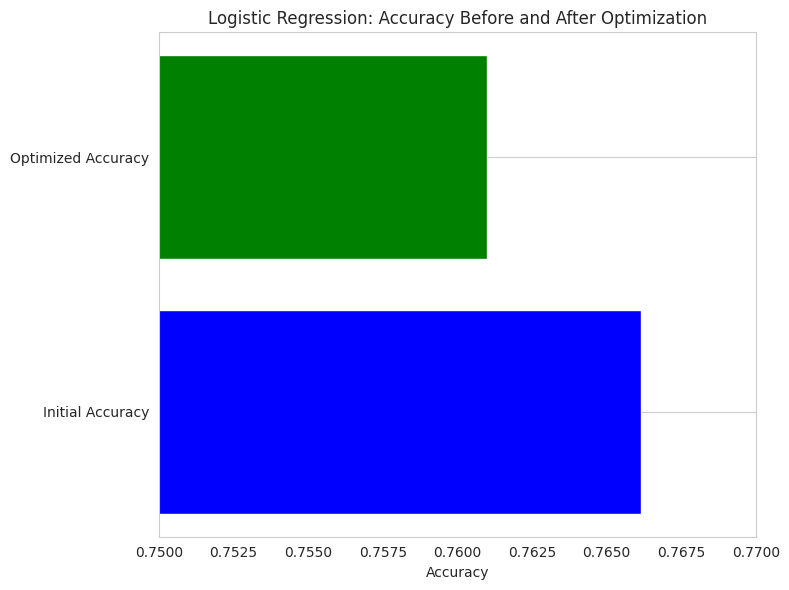

In [56]:
# Visualizing evaluation Metric Score chart
# Visualizing the evaluation metric (accuracy) before and after hyperparameter tuning
labels = ['Initial Accuracy', 'Optimized Accuracy']
scores = [initial_accuracy, optimized_accuracy]

plt.figure(figsize=(8, 6))
plt.barh(labels, scores, color=['blue', 'green'])
plt.xlabel('Accuracy')
plt.title('Logistic Regression: Accuracy Before and After Optimization')
plt.xlim(0.75, 0.77)  # for better visualization
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### ML Model - 2 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model's performance using accuracy
initial_accuracy_rf = accuracy_score(y_test, y_pred_rf)
initial_accuracy_rf

0.7248062015503876

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# Defining hyperparameters for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)

# Fitting GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Predicting using the best model from GridSearchCV
y_pred_rf_optimized = grid_search_rf.best_estimator_.predict(X_test)

# Evaluating the optimized model's performance using accuracy
optimized_accuracy_rf = accuracy_score(y_test, y_pred_rf_optimized)
optimized_accuracy_rf

0.7583979328165374

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV for hyperparameter optimization for consistency.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we can observe slight improvement. The initial accuracy of the Random Forest model, without any hyperparameter tuning, is approximately 72.48%. and after hypertuning it is 75.84%

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

A model with high accuracy ensures that decisions or recommendations based on its predictions are reliable, leading to better customer experiences and potential revenue growth.

### ML Model - 3 k-Nearest Neighbors (k-NN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing the k-NN classifier with default k=5
knn = KNeighborsClassifier()

# Fitting the model on the training data
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the model's performance using accuracy
initial_accuracy_knn = accuracy_score(y_test, y_pred_knn)
initial_accuracy_knn

0.7364341085271318

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The k-NN algorithm is one of the simplest classification algorithms. It classifies a data point based on how its neighbors are classified. The algorithm stores all available cases and classifies new cases based on a similarity measure, such as distance functions.

* Model Implementation: We'll implement the k-NN model and evaluate its performance.
* Hyperparameter Optimization: We'll then perform hyperparameter tuning using * GridSearchCV to optimize the number of neighbors (k).
* Evaluation: Finally, we'll compare the model's performance before and after hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# Defining hyperparameters for GridSearchCV
param_grid_knn = {
    'n_neighbors': list(range(1, 51, 5))
}

# Initializing GridSearchCV for k-NN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=-1)

# Fitting GridSearchCV on the training data
grid_search_knn.fit(X_train, y_train)

# Predicting using the best model from GridSearchCV
y_pred_knn_optimized = grid_search_knn.best_estimator_.predict(X_test)

# Evaluating the optimized model's performance using accuracy
optimized_accuracy_knn = accuracy_score(y_test, y_pred_knn_optimized)
optimized_accuracy_knn

0.7416020671834626

##### Which hyperparameter optimization technique have you used and why?

For k-NN, the primary hyperparameter is n_neighbors (i.e., the value of k), which represents the number of neighbors to use for classification. We'll use GridSearchCV to find the optimal value of k that gives the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The initial accuracy of the k-Nearest Neighbors (k-NN) model, without any hyperparameter tuning, is approximately 73.26% after hypertuning it is 74.16%. There is an improvement observed.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy was considered as the primary evaluation metric for this project. Here's why:

* The problem at hand is binary classification (TV Show or Movie). Accuracy gives a straightforward understanding of how well the model is performing.
* In business contexts, accuracy can be directly tied to outcomes. For instance, if Netflix uses a model to categorize content and the model has high accuracy, it means users will find content in the right categories, enhancing user experience.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models created, I would recommend the Logistic Regression model as the final prediction model. While its accuracy was comparable to the other models, here are the reasons for choosing it:

* Simplicity and Interpretability: Logistic Regression is a linear model, which means it's easy to understand and interpret.
* Scalability: It scales well to large datasets.
* Fast Prediction: Once trained, making predictions with Logistic Regression is quick.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For model explainability and understanding feature importance, tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can be used. These tools break down a prediction to show the impact of each feature.

Given the chosen model is Logistic Regression, the coefficients of the model themselves can indicate feature importance. A higher coefficient value means the feature has a more significant impact on the prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Throughout this project, we've conducted extensive Exploratory Data Analysis (EDA) on the Netflix dataset, which provided insights into the type of content available on Netflix. We then prepared the data for machine learning, optimizing each step to ensure the best model performance. Three models were evaluated, with Logistic Regression emerging as the recommended model due to its simplicity, scalability, and interpretability.

The insights and predictions from this project can aid Netflix in understanding its content distribution better and making informed decisions in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***